In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#Importing the dataset


dataset = pd.read_csv('Social_Network_Ads.csv')       #dataset is of type DataFrame

X = dataset.iloc[:,[2,3]].values           #using .values generates array
y = dataset.iloc[:,-1].values             #x & y is of type np.ndarray


In [3]:
#Splitting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25 , random_state = 0)
print(X_train.shape)

(300, 2)


In [4]:
#Splitting the dataset into Training set and Test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25 , random_state = 0)
print(X_train.shape)

(300, 2)


In [5]:
#Feature Scaling is actually not Needed here . As this process is not  dependent
#on Euclidian distance , features with larger values won't dominate the features
#with smaller values.We are still doing is,because the graph code is set for 
#the scales values

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)



In [11]:
#Fitting Support Vector Classifier to the dataset

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier( criterion = 'entropy'  , random_state = 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [12]:
#Prediicting the Test Set results

y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [13]:
#Making ConfusionMatrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[62  6]
 [ 3 29]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


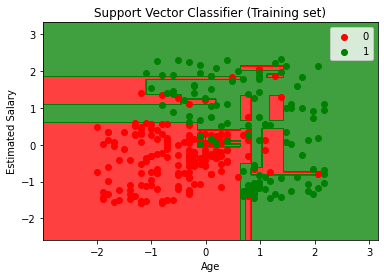

In [14]:
#Visualizing the training set results 
from matplotlib.colors import ListedColormap
X_set ,y_set = X_train ,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                                                   np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(("red","green")))
plt.xlim(X1.min() , X1.max())
plt.ylim(X2.min() , X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0] , X_set[y_set == j,1],
              c = ListedColormap(("red" , "green"))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


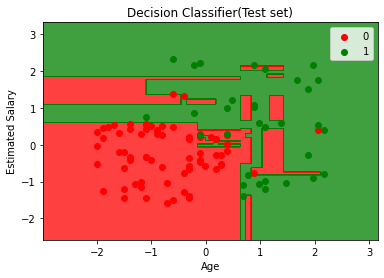

In [15]:
#Visualizing teh test set results 
from matplotlib.colors import ListedColormap
X_set ,y_set = X_test ,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                                                   np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(("red","green")))
plt.xlim(X1.min() , X1.max())
plt.ylim(X2.min() , X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set == j,0] , X_set[y_set == j,1],
              c = ListedColormap(("red" , "green"))(i), label = j)
plt.title('Decision Classifier(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
